In [158]:
import numpy as np 
import pandas as pd
import os
import random
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras import utils, callbacks
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99))


train = gen.flow_from_directory(r"C:\Users\yanna\CNN\Brain_tumor\kaggle\input\Brain Tumor Data Set\Brain Tumor Data Set",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 129,
                               subset = "training",)

val = gen.flow_from_directory(r"C:\Users\yanna\CNN\Brain_tumor\kaggle\input\Brain Tumor Data Set\Brain Tumor Data Set",
                               target_size = (150,150),
                               batch_size = 1, #J'avais mis 64 mais j'ai changé par 1 pour pouvoir plot les images 1 par 1
                               #class_mode = "categorical",
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = False,
                               save_to_dir=None, save_prefix='', save_format='png',follow_links=False,
                               subset = "validation",)

classes = val.class_indices
classes

#print("done")


Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


{'Brain Tumor': 0, 'Healthy': 1}

In [134]:
print(val.filenames[0])

Brain Tumor\Cancer (1).jpg


In [139]:
val.labels[0]

print(val.labels[900])

for i in range(len(val.labels)):
    print("label :", val.labels[i], "  ")
    print("title image :", val.filenames[i])
    
print("done")

1
label : 0   
title image : Brain Tumor\Cancer (1).jpg
label : 0   
title image : Brain Tumor\Cancer (1).png
label : 0   
title image : Brain Tumor\Cancer (1).tif
label : 0   
title image : Brain Tumor\Cancer (10).jpg
label : 0   
title image : Brain Tumor\Cancer (10).tif
label : 0   
title image : Brain Tumor\Cancer (100).jpg
label : 0   
title image : Brain Tumor\Cancer (1000).jpg
label : 0   
title image : Brain Tumor\Cancer (1001).jpg
label : 0   
title image : Brain Tumor\Cancer (1002).JPG
label : 0   
title image : Brain Tumor\Cancer (1003).jpg
label : 0   
title image : Brain Tumor\Cancer (1004).jpg
label : 0   
title image : Brain Tumor\Cancer (1005).jpg
label : 0   
title image : Brain Tumor\Cancer (1006).jpg
label : 0   
title image : Brain Tumor\Cancer (1007).jpg
label : 0   
title image : Brain Tumor\Cancer (1008).jpg
label : 0   
title image : Brain Tumor\Cancer (1009).jpg
label : 0   
title image : Brain Tumor\Cancer (101).jpg
label : 0   
title image : Brain Tumor\Cance

label : 0   
title image : Brain Tumor\Cancer (1316).jpg
label : 0   
title image : Brain Tumor\Cancer (1317).jpg
label : 0   
title image : Brain Tumor\Cancer (1318).jpg
label : 0   
title image : Brain Tumor\Cancer (1319).jpg
label : 0   
title image : Brain Tumor\Cancer (132).jpg
label : 0   
title image : Brain Tumor\Cancer (1320).jpg
label : 0   
title image : Brain Tumor\Cancer (1321).jpg
label : 0   
title image : Brain Tumor\Cancer (1322).jpg
label : 0   
title image : Brain Tumor\Cancer (1323).jpg
label : 0   
title image : Brain Tumor\Cancer (1324).jpg
label : 0   
title image : Brain Tumor\Cancer (1325).jpg
label : 0   
title image : Brain Tumor\Cancer (1326).jpg
label : 0   
title image : Brain Tumor\Cancer (1327).jpg
label : 0   
title image : Brain Tumor\Cancer (1328).jpg
label : 0   
title image : Brain Tumor\Cancer (1329).jpg
label : 0   
title image : Brain Tumor\Cancer (133).jpg
label : 0   
title image : Brain Tumor\Cancer (1330).jpg
label : 0   
title image : Brain 

label : 1   
title image : Healthy\Not Cancer  (1145).jpg
label : 1   
title image : Healthy\Not Cancer  (1146).jpg
label : 1   
title image : Healthy\Not Cancer  (1147).jpg
label : 1   
title image : Healthy\Not Cancer  (1148).jpg
label : 1   
title image : Healthy\Not Cancer  (1149).jpg
label : 1   
title image : Healthy\Not Cancer  (115).jpg
label : 1   
title image : Healthy\Not Cancer  (1150).jpg
label : 1   
title image : Healthy\Not Cancer  (1151).jpg
label : 1   
title image : Healthy\Not Cancer  (1152).jpg
label : 1   
title image : Healthy\Not Cancer  (1153).jpg
label : 1   
title image : Healthy\Not Cancer  (1154).jpg
label : 1   
title image : Healthy\Not Cancer  (1155).jpg
label : 1   
title image : Healthy\Not Cancer  (1156).jpg
label : 1   
title image : Healthy\Not Cancer  (1157).jpg
label : 1   
title image : Healthy\Not Cancer  (1158).jpg
label : 1   
title image : Healthy\Not Cancer  (1159).jpg
label : 1   
title image : Healthy\Not Cancer  (116).jpg
label : 1   
tit

In [136]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=16,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Flatten()) 

earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)
    
    
  
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(0.0001),loss = BinaryCrossentropy(),metrics=['accuracy'])
model.summary()


history1 = model.fit(train,verbose=2,callbacks = [earlystopping],epochs=15,validation_data=(val))
    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 43808)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [29]:
import cv2

def prepare(filepath):
    img_size = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size,img_size))
    return new_array.reshape(-1,img_size,img_size,1)


prediction = model.predict([prepare('cerveau.jpg')])
print(prediction)

ValueError: in user code:

    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "conv2d_2" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 100, 100, 1)
    
    Call arguments received by layer "sequential_1" (type Sequential):
      • inputs=('tf.Tensor(shape=(None, 100, 100, 1), dtype=uint8)',)
      • training=False
      • mask=None


In [30]:
#pred = model.predict(np.array([r"C:\Users\yanna\CNN\Brain_tumor\cerveau2.png"]))
pred = model.predict(list(r"C:\Users\yanna\CNN\Brain_tumor\cerveau2.png"))



print(pred)

ValueError: in user code:

    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\yanna\AppData\Roaming\Python\Python39\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_1" (type Sequential).
    
    Input 0 of layer "conv2d_2" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_1" (type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=False
      • mask=None


In [62]:
pred = model.predict(val)

print(len(pred))

pred = model.predict(train)

print(len(pred))


919/919 [==============================] - 9s 9ms/step
919
15/15 [==============================] - 26s 2s/step
3681


In [59]:
pred = model.predict(val[1:5][0][0])

print(pred)

TypeError: '>=' not supported between instances of 'slice' and 'int'

In [ ]:
pred = model.predict(val)
print(len(pred))


for i in range(10):
    fig = plt.figure(i+1)
    #ax = fig.add_subplot(3, 1, i+1)
    N = random.randint(0,919)
    print(" N :",N)
    imgplot = plt.imshow(val[N][0][0])
    #ax.set_title("title image :" + str(val.filenames[i]) + str(val.labels[i]) +str(pred[N]))
    #ax.set_title("title image :" + str(val.filenames[i]))
    print("label :", val.labels[N], "  ")
    print("title image :", val.filenames[N])
    if val.labels[N] == 0:
        plt.title("image avec Tumeur (0), prediction :"  +str(pred[N]))
    elif val.labels[N] == 1:
        plt.title("image sans Tumeur (1), prediction :" + str(pred[N]))
    else:
        plt.title("erreur")

    #print("label :", val.labels[i], "  ")
    #print("title image :", val.filenames[i])
    
    #print("classes = val.class_indices :", val[N].class_indices)

    

In [143]:
pred = model.predict(train)
print(len(pred))


for i in range(10):
    fig = plt.figure(i+1)
    #ax = fig.add_subplot(3, 1, i+1)
    N = random.randint(0,15)
    print(" N :",N)
    imgplot = plt.imshow(train[N][0][0])
    #ax.set_title("title image :" + str(val.filenames[i]) + str(val.labels[i]) +str(pred[N]))
    #ax.set_title("title image :" + str(val.filenames[i]))
    print("label :", train.labels[N], "  ")
    print("title image :", train.filenames[N])
    if train.labels[N] == 0:
        plt.title("image avec Tumeur (0), prediction :"  +str(pred[N]))
    elif train.labels[N] == 1:
        plt.title("image sans Tumeur (1), prediction :" + str(pred[N]))
    else:
        plt.title("erreur")

    #print("label :", val.labels[i], "  ")
    #print("title image :", val.filenames[i])
    
    #print("classes = val.class_indices :", val[N].class_indices)


15/15 [==============================] - 37s 2s/step
3681
 N : 356


ValueError: Asked to retrieve element 356, but the Sequence has length 15

<Figure size 432x288 with 0 Axes>

In [ ]:
ax.set_title("title image : + str(val.filenames[i]) + : str(val.labels[i]) str(pred[N])")

Brain Tumor\Cancer (1086).JPG


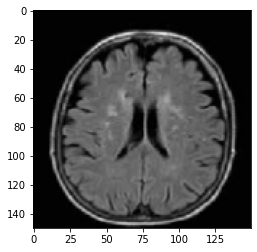

In [161]:
n = 100
print(val.filenames[n])

imgplot = plt.imshow(val[n][0][0])

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
done


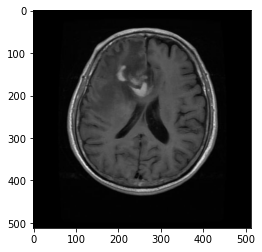

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('cerveau.jpg')
print(img)
imgplot = plt.imshow(img)

print('done')

KeyboardInterrupt: 

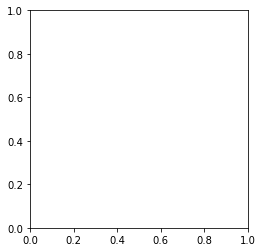

In [33]:
#img = mpimg.imread(val[0])
#print(img)
imgplot = plt.imshow(val)
plt.show()

In [37]:
print(val[0][0][0][0])

[[0.7000592  0.7000592  0.7000592 ]
 [0.7211209  0.7211209  0.7211209 ]
 [0.5386309  0.5386309  0.5386309 ]
 [0.54395944 0.54395944 0.54395944]
 [0.54364884 0.54364884 0.54364884]
 [0.55094767 0.55094767 0.55094767]
 [0.5582562  0.5582562  0.5582562 ]
 [0.55852795 0.55852795 0.55852795]
 [0.5476959  0.5476959  0.5476959 ]
 [0.53400004 0.53400004 0.53400004]
 [0.53400004 0.53400004 0.53400004]
 [0.5347474  0.5347474  0.5347474 ]
 [0.5359412  0.5359412  0.5359412 ]
 [0.5359412  0.5359412  0.5359412 ]
 [0.5352521  0.5352521  0.5352521 ]
 [0.53400004 0.53400004 0.53400004]
 [0.53400004 0.53400004 0.53400004]
 [0.5365236  0.5365236  0.5365236 ]
 [0.54176474 0.54176474 0.54176474]
 [0.54176474 0.54176474 0.54176474]
 [0.53946257 0.53946257 0.53946257]
 [0.5389846  0.5389846  0.5389846 ]
 [0.5467407  0.5467407  0.5467407 ]
 [0.5386321  0.5386321  0.5386321 ]
 [0.54908323 0.54908323 0.54908323]
 [0.5422499  0.5422499  0.5422499 ]
 [0.5428328  0.5428328  0.5428328 ]
 [0.5420554  0.5420554  0.54

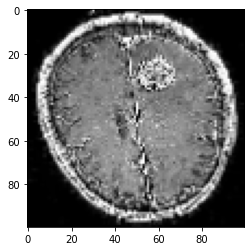

In [49]:
imgplot = plt.imshow(val[5][0][0])
plt.show()

In [ ]:
predic = model.predict(val)

for i in range(5):
    plt.grid(False)
    plt.imshow(val[i])
    plt.xlabel("Actual: ")
    plt.title(no.argmax(predic[i]))
    plt.show()